In [ ]:
%load_ext autoreload
%autoreload 2


from util import *
from myalgorithm import algorithm
from baseline import base_algorithm



In [12]:

problem_file = 'STAGE1_1.json'
timelimit = 30

# np.random.seed(1)

with open(problem_file, 'r') as f:
    prob = json.load(f)

K = prob['K']

ALL_ORDERS = [Order(order_info) for order_info in prob['ORDERS']]
ALL_RIDERS = [Rider(rider_info) for rider_info in prob['RIDERS']]

DIST = np.array(prob['DIST'])
for r in ALL_RIDERS:
    r.T = np.round(DIST/r.speed + r.service_time)

alg_start_time = time.time()

exception = None

solution = None
'''try:
    # Run algorithm!
    solution = algorithm(K, ALL_ORDERS, ALL_RIDERS, DIST, timelimit)
except Exception as e:
    exception = f'{e}'''
#solution = algorithm(K, ALL_ORDERS, ALL_RIDERS, DIST, timelimit)
solution = base_algorithm(K, ALL_ORDERS, ALL_RIDERS, DIST, timelimit)

alg_end_time = time.time()

with open(problem_file, 'r') as f:
    prob = json.load(f)

K = prob['K']

ALL_ORDERS = [Order(order_info) for order_info in prob['ORDERS']]
ALL_RIDERS = [Rider(rider_info) for rider_info in prob['RIDERS']]

DIST = np.array(prob['DIST'])
for r in ALL_RIDERS:
    r.T = np.round(DIST/r.speed + r.service_time)

checked_solution = solution_check(K, ALL_ORDERS, ALL_RIDERS, DIST, solution)

checked_solution['time'] = alg_end_time - alg_start_time
checked_solution['timelimit_exception'] = (alg_end_time - alg_start_time) > timelimit + 1 # allowing additional 1 second!
checked_solution['exception'] = exception

checked_solution['prob_name'] = prob['name']
checked_solution['prob_file'] = problem_file

checked_solution

Best obj = 7322.13
Best obj = 7288.92
Best obj = 7247.16
Best obj = 7177.2
Best obj = 7118.67
Best obj = 7080.1
Best obj = 7046.72
Best obj = 6993.27
Best obj = 6926.3
Best obj = 6884.81
Best obj = 6848.52
Best obj = 6799.87
Best obj = 6733.46
Best obj = 6720.31
Best obj = 6662.85
Best obj = 6634.79
Best obj = 6605.45
Best obj = 6560.41
Best obj = 6528.25
Best obj = 6456.37
Best obj = 6437.62
Best obj = 6393.51
Best obj = 6337.3
Best obj = 6296.87
Best obj = 6237.96
Best obj = 6203.41
Best obj = 6177.39
Best obj = 6136.62
Best obj = 6111.72
Best obj = 6063.04
Best obj = 6027.13
Best obj = 6015.49
Best obj = 5991.01
Best obj = 5945.91
Best obj = 5875.29
Best obj = 5822.97
Best obj = 5750.954000000001
Best obj = 5669.086000000001
Best obj = 5587.284000000001
Best obj = 5507.011000000001
Best obj = 5448.946999999999
Best obj = 5429.654
Best obj = 5364.321
Best obj = 5288.608
Best obj = 5218.151000000001


{'total_cost': 521815.10000000003,
 'avg_cost': 5218.151000000001,
 'num_drivers': 50,
 'total_dist': 210132,
 'feasible': True,
 'infeasibility': None,
 'bundles': [['WALK', [1], [1]],
  ['WALK', [3], [3]],
  ['BIKE', [26], [26]],
  ['WALK', [63], [63]],
  ['BIKE', [69], [69]],
  ['WALK', [71], [71]],
  ['WALK', [72], [72]],
  ['WALK', [78], [78]],
  ['WALK', [83], [83]],
  ['WALK', [84], [84]],
  ['WALK', [96], [96]],
  ['WALK', [97], [97]],
  ['WALK', [99], [99]],
  ['CAR', [14, 54], [14, 54]],
  ['BIKE', [11, 21], [11, 21]],
  ['BIKE', [49, 43], [43, 49]],
  ['BIKE', [50, 55], [50, 55]],
  ['BIKE', [24, 46], [46, 24]],
  ['BIKE', [23, 34, 58], [23, 34, 58]],
  ['BIKE', [90, 87], [90, 87]],
  ['BIKE', [5, 35], [5, 35]],
  ['CAR', [29, 48], [29, 48]],
  ['CAR', [75, 85], [75, 85]],
  ['CAR', [41, 61], [41, 61]],
  ['CAR', [31, 77], [31, 77]],
  ['CAR', [42, 32], [32, 42]],
  ['CAR', [19, 38, 16], [19, 38, 16]],
  ['CAR', [39, 25], [39, 25]],
  ['CAR', [6, 15], [6, 15]],
  ['CAR', [12

In [ ]:
draw_route_solution(ALL_ORDERS, checked_solution)

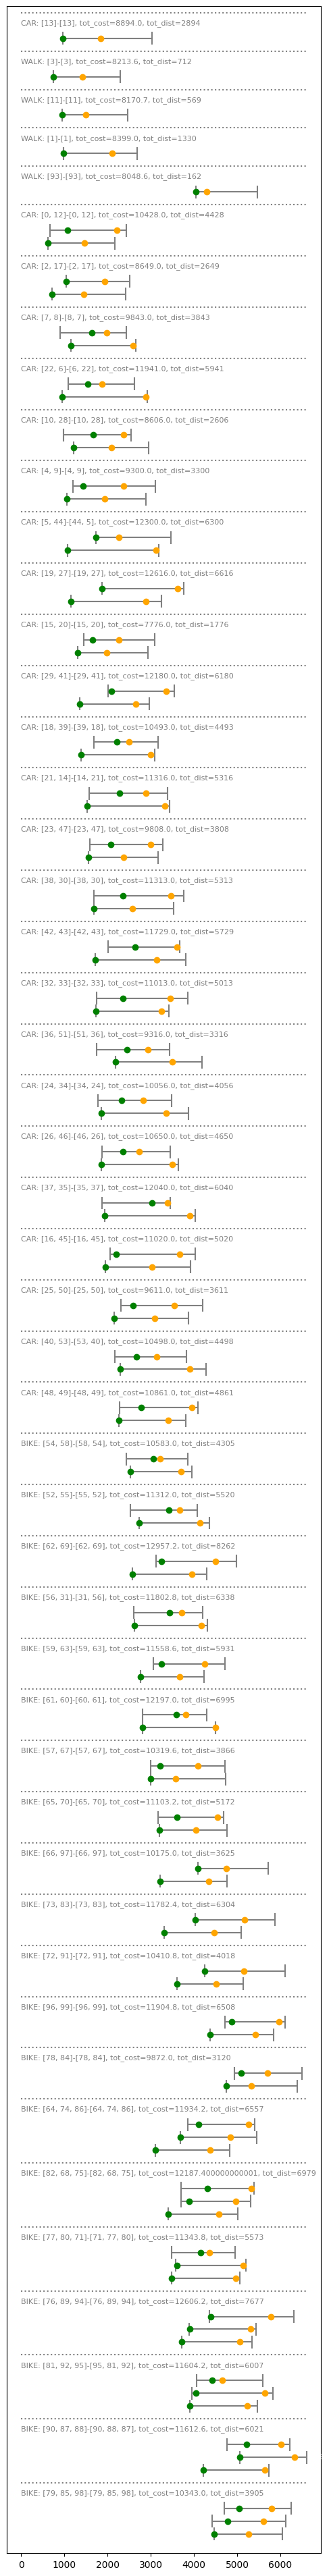

In [11]:
draw_bundle_solution(ALL_ORDERS, ALL_RIDERS, DIST, checked_solution)